### Colab Activity 18.2: Bag of Words and TF-IDF

**Expected Time = 60 minutes**


In this activity you will use the Scikit-Learn vectorization tools `CountVectorizer` and  `TfidfVectorizer`  to create a bag of words representation of text in a DataFrame.  You will explore how different parameter settings affect the performance of a `LogisticRegression` estimator on a binary classification problem.

Thi activity uses the [SMS Spam Collection](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?select=spam.csv) dataset. This dataset contains is a set of 5,574 SMS tagged messages according being ham (legitimate) or spam.

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)
- [Problem 7](#-Problem-7)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,  TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prove\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
email_data = pd.read_csv('data/spam.csv', encoding = 'latin-1' )

In [3]:
email_data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Exploratory data analysis

<Axes: xlabel='count', ylabel='v1'>

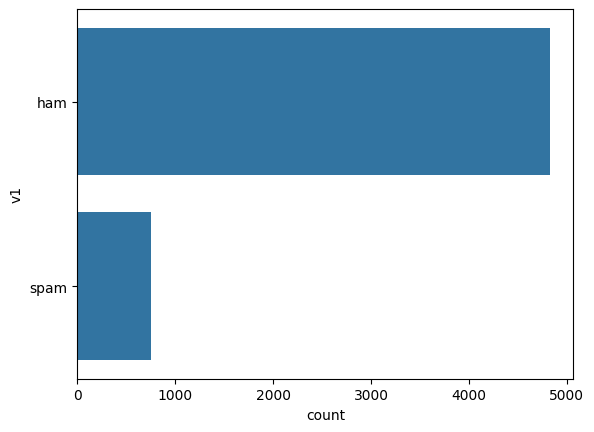

In [4]:
sns.countplot(email_data['v1'], label = "Count of the Labels")

From the count plot, the dataset appears not to be balanced. There are more data that are classified as ham other than spam.

## Data Cleaning and Data Preprocessing


Before the data can be fed to a machine learning model, it is required to clean the data first.



In [5]:
#dropping the columnns with NaNs
email_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis  = 1, inplace = True)

In [6]:
#renaming the remaining columns
email_data = email_data.rename(columns = {"v1": "label", "v2": "text"})

In [7]:
email_data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


The function `clean_review` below removes all the punctuations and all the common words.

In [8]:
def clean_review(review):
    remove_punctuation = [word for word in review if word not in string.punctuation]
    join_characters = ''.join(remove_punctuation)
    remove_stopwords = [word for word in join_characters.split() if word.lower() not in stopwords.words('english')]
    cleaned_review = remove_stopwords
    return cleaned_review

[Back to top](#-Index)

### Problem 1

#### Using the `CountVectorizer`


To create a bag of words representation of your text data, below create an instance of the `CountVectorizer` with argument `analyzer` equal to `clean_review`  as `count_vectorizer`.

Next, use the `fit_transform` function on `count_vectorizer` to transform the `text` column of the `email_data` DataFrame and assign the transformed version of the text to `email_countvec`.  


In [9]:

count_vectorizer = CountVectorizer(analyzer = clean_review)

email_countvec = count_vectorizer.fit_transform(email_data['text'])

[Back to top](#-Index)

### Problem 2

#### Encoding the Dependent Variable `label`

In the code cell below, initialize an instance of `LabelEncoder` and assign it to the variable `le`.



Next, use the `fit_transform` function on `le` to transform the `label` column of the `email_data` DataFrame and assign the transformed version of the text to `email_data['label']`.  

In [10]:
le = LabelEncoder()
email_data['label'] = le.fit_transform(email_data['label'])

## Splitting the Data into Training and Testing

Run the code cells below to split the data into training and testing sets.


In [11]:
X = email_countvec
y = email_data['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

[Back to top](#-Index)

### Problem 3

#### Classification using `LogisticRegression`

In the code cell below, instantiate an instance of the `LogisticRegression` classifier with default parameters and assign it to the variable `classifier`.

Fit this classifier on the training data `X_train` and `y_train`.


In [13]:
classifier = LogisticRegression() 
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


[Back to top](#-Index)

### Problem 4

#### Evaluating the CountVectorizer Model

In the code cell below, use the `predict` function on `classifier` to compute the predictions on the test set `X_test`. Assign the result to `y_pred`.

Next, use `classification_report` to print a report of your findings using `y_test` and `y_pred`.

In [14]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1200
           1       1.00      0.90      0.95       193

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



[Back to top](#-Index)

### Problem 5

#### Using TF-IDF

In the code cell below, create an instance of the `TfidfVectorizer` with default parameters as `tfidf`,with argument `analyzer` equal to `clean_review`.

Next, use the `fit_transform` function on `tfidf` to transform the `text` column of the `email_data` DataFrame and assign the transformed version of the text to `tfidfvec`.  

In [15]:
tfid = TfidfVectorizer(analyzer = clean_review)
tfidvec = tfid.fit_transform(email_data['text'])

## Splitting the Data into Training and Testing

Run the code cells below to split the data into training and testing sets.

In [16]:
X2 = tfidvec
y2 = email_data['label']

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25)

[Back to top](#-Index)

### Problem 6

#### Classification using `LogisticRegression`

In the code cell below, instantiate an instance of the `LogisticRegression` classifier with default parameters and assign it to the variable `classifier2`.

Fit this classifier on the training data `X_train2` and `y_train2`.

In [18]:
classifier2 = LogisticRegression() 
classifier2.fit(X_train2, y_train2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


[Back to top](#-Index)

### Problem 7

#### Evaluating the TF-IDF Model

In the code cell below, use the `predict` function on `classifier2` to compute the predictions on the test set `X_test2`. Assign the result to `y_pred2`.

Next, use `classification_report` to print a report of your findings using `y_test2` and `y_pred2`.

In [19]:
y_pred2 = classifier2.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1189
           1       0.98      0.53      0.69       204

    accuracy                           0.93      1393
   macro avg       0.95      0.76      0.82      1393
weighted avg       0.93      0.93      0.92      1393



Comment on the performance of the two models. 

While comparing BoW and TF-IDF based on Classification report it can be seen
1. For Majority Class TF-IDF has lower precision, but better F1-Scor.e
2. For Minority ClasF Recall and F1-Score is better in B in comparison to TF-IDF.W.
3. Overall Accuracy is better in BoW. In this specific dataset, BoW is clearly the better model. 